## **The bias variance tradeoff (Compensación de varianza y sesgo)**

Ejemplo: Comparando el tamaño del cuerpo y del cerebro de mamiferos: estamos considerando una relación entre estas dos características. Una hipótesis puedes ser que existe una correlacion positiva entre los dos(a medida que aumenta uno, también lo hace el otro) Qué ta fuerte es esta relacion? Es siquiera lineal?. pudiera ser que a media que aumenta el peso del cerebro ocurre un aumento logarítmico o cuadrático en el peso corporal 

In [99]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_table('resources/x01.txt',
                   sep='\s +', skiprows=33, names=['id', 'brain', 'body'], index_col='id',engine='python')
df.head()


,brain,body
id,,
1,3.385,44.5
2,0.480,15.5
3,1.350,8.1
4,465.000,423.0
5,36.330,119.5


tamaño de la muestra:  51


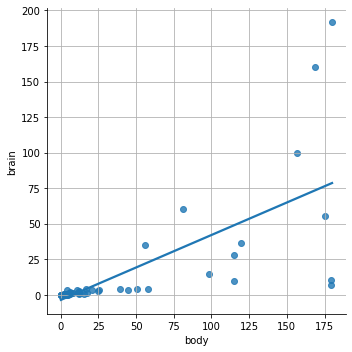

In [100]:
# We're going to focus on a smaller subset in which the body weight is less than 200:
df = df[df.body < 200]
print('tamaño de la muestra: ', df.shape[0])

# vamos a pretender que este subconjunto de datos es el de todas las especies de mamiferos

# Let's create a scatterplot
sns.lmplot(x='body', y='brain', data=df, ci=None)
# plt.scatter(df.body, df.brain, c='blue', s=30) # similar pero sin la linea de mejor ajuste
plt.grid()



Si ahora una especie tiene un peso corporal de 100 podriamos prediecir que el peso medio del cerebro, utilizando esta línea es de 45. Pero como podemos notar esta linea no esta cerca de los puntos de datos y tiene un **sesgo muy alto**. Comprobemos que sin embargo tienen **varianza muy baja** que es **común en modelos de regresion lineal**

In [101]:
# set a random seed for reproducibility
np.random.seed(12345)

# randomly assign every row to either sample 1 or sample 2
df['sample'] = np.random.randint(1, 3, len(df))
print(df.head())

# Compare the two samples, they are fairly different!
df.groupby('sample')[['brain', 'body']].mean()


     brain   body  sample
id                       
1    3.385   44.5       1
2    0.480   15.5       2
3    1.350    8.1       2
5   36.330  119.5       2
6   27.660  115.0       1


,brain,body
sample,,
1,18.113778,52.068889
2,13.323364,34.669091


Text(0.5, 1.0, 'UNDERFITING')

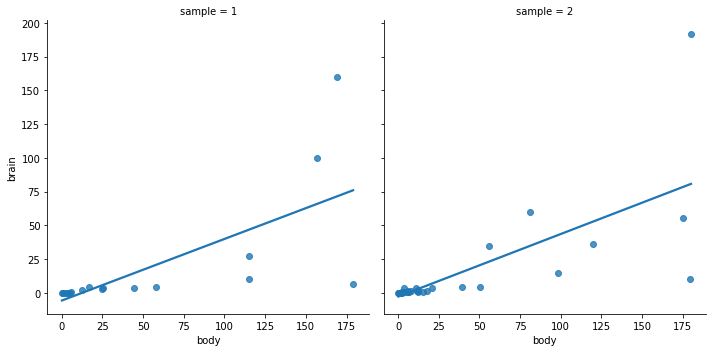

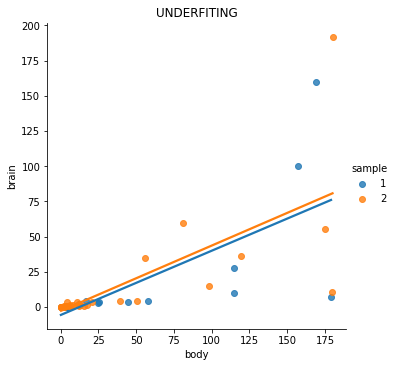

In [102]:
# col='sample' subsets the data by sample and creates two
# separate plots
from turtle import title


sns.lmplot(x='body', y='brain', data=df, ci=None, col='sample')

# ponerlos en un solo gráfico
sns.lmplot(x='body', y='brain', data=df, ci=None, hue='sample',)
plt.title('UNDERFITING')


Podemos ver que las muestras no tienen ni un punto de datos común y tienen lineas casi identicas; es decir de que a pesar de que se aplico sobre conjuntos de datos distintos extraidos de la misma poblacion, produjo una linea muy similar(prediciones muy similares)y esto es lo q que se refiere tener **baja varianza** 

> ahora veamos un ejemplo de **bajo sesgo y alta varinza**

Por ejemplo probemos la regresion polinomica de grado 4

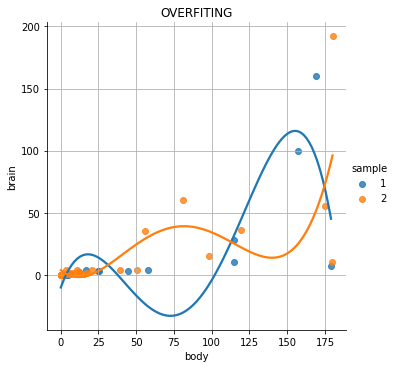

In [103]:
sns.lmplot(x='body', y='brain', data=df, ci=None, hue='sample', order=4)
plt.title('OVERFITING')
plt.grid()


Este polinomio de grado 4 pierde la relacion general de los datos ya que uno de ellos se dispara hacia abajo. **Nuestro trabjo como cienticos de datoas es encontrar un punto medio**. Probemnos con un polinomio de segundo orden

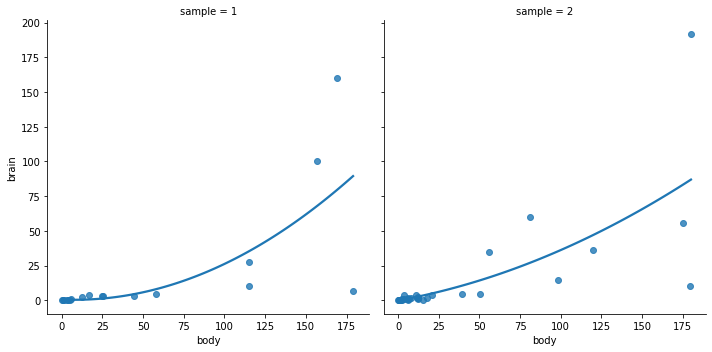

In [104]:
# Let's try a second order polynomial instead:
sns.lmplot(x='body', y='brain', data=df, ci=None, col='sample', 
order=2)


# **K-Folds Cross Validation**

In [105]:
'''crear manualmente 5 pliegues de  cross-validation, en la que se hacen 5 diferentes conjuntos de entremiento y prueba de la misma poblacion z'''

df = pd.read_table('resources/x01.txt',    sep='\s +', skiprows=33,
                   names=['brain', 'body'], engine='python')

df = df[df.brain < 300][df.body < 500]
df.describe()


C:\Users\Manue!_PC\AppData\Local\Temp\ipykernel_5352\1859097908.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df.brain < 300][df.body < 500]


,brain,body
count,56.000000,56.000000
mean,27.624625,74.309286
std,58.878065,122.418808
min,0.005000,0.140000
25%,0.466250,3.800000
50%,2.250000,12.400000
75%,11.620000,102.400000
max,250.000000,490.000000


validation or test index 0 :  [11 13 18 21 26 27 35 39 40 41 50 53]
validation or test index 1 :  [ 0  1  5  6  8 10 12 23 29 30 47]
validation or test index 2 :  [ 7 15 20 24 31 37 44 46 51 52 54]
validation or test index 3 :  [ 3  4  9 14 16 25 36 43 48 49 55]
validation or test index 4 :  [ 2 17 19 22 28 32 33 34 38 42 45]


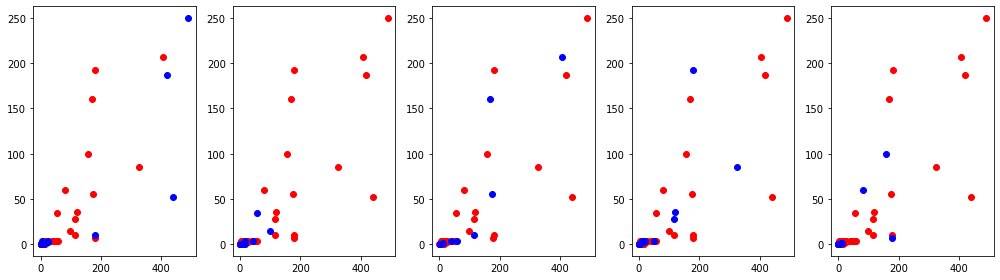

In [106]:
from sklearn.model_selection import KFold

# limit points for visibility
nfolds = 5

fig, axes = plt.subplots(1, nfolds, figsize=(14, 4))

kf = KFold(n_splits=nfolds, shuffle=True, random_state=123)

for i, fold in enumerate(kf.split(df)):
    
    # obtener los indicis de cada pliegue
    training, validation = fold
    print(f'validation or test index {i} : ' ,validation)

    x, y = df.iloc[training]['body'], df.iloc[training]['brain']
    axes[i].plot(x, y, 'ro')
    x, y = df.iloc[validation]['body'], df.iloc[validation]['brain']
    axes[i].plot(x, y, 'bo')
plt.tight_layout()


El gráfico muestra la misma población de mamíferos pero dividida en conjunto en 5 instancias diferentes del mismo modelo de ML para ver si el rendimiento sigue siendo consistente en todos los pliegues. Además cada punto esta de color azul una sola vez, es decir que es utilizado como conjunto de prueba una sola,vez

> Ahora hagamos uso de del modulo de **Cross Validation**

In [107]:
'''Remember cross validation  is using several different train test splits and 
averaging your results!'''

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
X, y = iris.data, iris.target


# check CV score for K=1
knn = KNeighborsClassifier(n_neighbors=1)

scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(scores.mean())
scores


0.96


array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

Comprobemos la Validacion cruzada con K=5 (Complejidad del KNN)

In [108]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
np.mean(scores)

0.9733333333333334

con complegidad K = 5 se mejora el nivel de precision. calculemos ahora la k que tiene maxima precision 

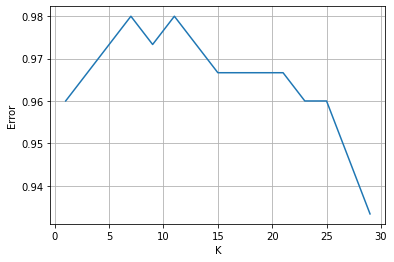

In [109]:
# search for an optimal value of K
k_range = range(1, 30, 2) # [1, 3, 5, 7, …, 27, 29]
errors = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    accuracy = np.mean(scores)
    errors.append(accuracy)

# plot the K values (x-axis) versus the 5-fold CV score (y-axis)
plt.figure()
plt.plot(k_range, errors)
plt.xlabel('K')
plt.ylabel('Error')
plt.grid()

Hacia la **izquierda del grafico un sesgo mas alto y UNDERFITING**  y a medida que aumentamos nuestra complejidad obtuvimos mejores precisiones pero despues **de cierto k nuestro modelo se volvio demasiado complejo y de alta varianza** haciendo que nuetro nivel de precision volviera a bajar.

Por lo que parece que nuestro valor de k optimo esta entre 6 y 11

# **Grid searching(busqueda en cuadricula)**
para encontrar el k optimo con fuerza bruta y basados en una metrica de nuestra eleccion 

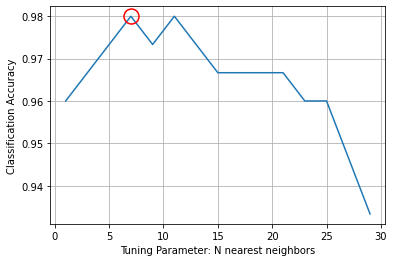

In [110]:
from sklearn.model_selection import GridSearchCV


# instantiate a blank slate KNN, no neighbors
knn = KNeighborsClassifier()

k_range = range(1, 30, 2)

# param_grid = {"n_ neighbors": [1, 3, 5, …]}
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# estamos validando CV = 5 para 15 k diferentes lo que da como resultado
# 75 modelos de ML en este caso de KKT
grid.fit(X, y)

# print(grid.cv_results_['mean_test_score'])

# this is a list of the average accuracies for each parameter  combination
grid_mean_scores = grid.cv_results_['mean_test_score']

plt.xlabel('Tuning Parameter: N nearest neighbors')
plt.ylabel('Classification Accuracy')
plt.plot(k_range, grid_mean_scores)

plt.plot(
    grid.best_params_['n_neighbors'],
    grid.best_score_, 'ro', markerfacecolor='None',
    markeredgecolor='r', markersize=15, markeredgewidth=1.5)
plt.grid()


>Observemos que este gráfico es el mismo que logramos con el ciclo for.

La **Grid Searching** es una forma _sencilla_ pero ineficinete de ajustar los parametros de nuestros modelos para obtener el mejor resultado posible. Los cientificos de datos deben utilizar la manipulacion de caracteristicas(**tanto la reducción como la ingeniería**) para obtener mejores resultados para no depender únicamente del módelo.

Veamos otro ejemplo añadiendo mas caracterias:



In [111]:
knn = KNeighborsClassifier()

k_range = range(1, 30)  # numero de vecinos de nuestro modelos KNN

algorithm_options = ['kd_tree', 'ball_tree', 'auto', 'brute']  # algoritmo a utilizr

p_range = range(1, 8)  # distancia a utilizar p=2 es la distacia euclidiana

weight_range = ['uniform', 'distance']  # ponderacion de los puntos

param_grid = dict(n_neighbors=k_range, weights=weight_range,
                  algorithm=algorithm_options, p=p_range)

# trying many more options
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# estamos provando 1648 combinaciones de parametros con CV= 5, es decir que estamos
#  ajustando 8 400 different KNN models!
grid.fit(X, y)
print(grid.best_score_)
grid.best_estimator_


0.9866666666666667


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=6, p=3)

# **Visualizing training error versus test error**

Volvamos a comparar el error en los datos de prueba con el error de entrenamiento y pongamoslo en un mismo gráfico para ver como cambian a medida que variamos la complejidad del modelo. Utilizaremos el conjunto de datos de los mamíferos para eso

Text(0, 0.5, 'RMSE')

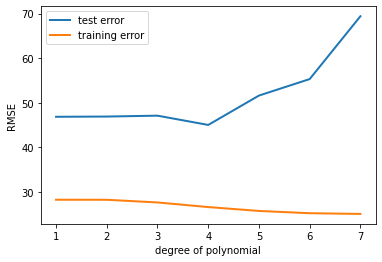

In [112]:
# This function uses a numpy polynomial fit function to
# calculate the RMSE of given X and y
def rmse(x, y, coefs):
    # evaluar el valor de x en un  polinomio dados los coeficientes
    yfit = np.polyval(coefs, x)
    rmse = np.sqrt(np.mean((y - yfit) ** 2))
    return rmse


train_err = []
test_err = []

xtrain, xtest, ytrain, ytest = train_test_split(df['body'], df['brain'], random_state=12344)

degrees = range(1, 8)
for d in degrees:

    # built in numpy polynomial fit function because ours data only two dimesnions
    # Ademas este metodo vevuelve un polinomio de ajuste que minimiza el error cuadrático
    p = np.polyfit(xtrain, ytrain, d)

    train_err.append(rmse(xtrain, ytrain, p))
    test_err.append(rmse(xtest, ytest, p))

fig, ax = plt.subplots()
# begin to make our graph
ax.plot(degrees, test_err, lw=2, label='test error')
ax.plot(degrees, train_err, lw=2, label='training error')

# Our two curves, one for training error, the other for crossvalidation
ax.legend(loc=0)
ax.set_xlabel('degree of polynomial')
ax.set_ylabel('RMSE')


A medida que aumentamos nuestro grado de ajuste nuestro error de entrenamiento baja sin problemas, pero ahora somos capaecez de saber que esto ocurre pq lo q esta ocurriendo es que nuestro modelos se esta **Overfiting** a nuestros datos y por eso la linea de error en los datos que nunca ha visto el modelo es mas honesta y a partir de grado 4 comienza a tener un mal rendimiento